# Interaktiv programmieren lernen mit Jupyter Notebooks



### Fellowship Projekt am CGRE

# Agenda

0. Ziel des Fellowships  
1. Stand der Dinge - Neuerungen zum zurückliegenden ETS Projekt  
2. Erweiterungen - NbExtensions
3. Prüfungsleistungen mit Jupyter Notebooks  
    3.1 Lokal erstellte Prüfungsaufgaben und Verteilung mit Moodle / l2p  
    3.2 Zentrale, serverseitig erstellte Prüfungsaufgaben 


## 1. Ziel des Fellowships  


<img src="https://cdn-images-1.medium.com/max/2000/1*brjYnVlXwM3j_SWXImT0Rg.png" style="float: right; width: 45%; margin-right: 3%; margin-bottom: 0.5em;"> 

<hr>
<center>*Programmieren ist schwer.*</center> 
<hr> 
So ist jedenfalls die Auffassung vieler.   

Doch sind (grundlegende) Programmierkenntnisse immer mehr von Vorteil.   


Gewünschte Kernkompetenzen im Arbeitsmarkt:  
* Datenanalyse, Dateninterpretation  
* allg. Digitalkompetenz  
* Programmieren


<img src="https://imgs.xkcd.com/comics/machine_learning.png" style="float: left; width: 35%; margin-right: 3%; margin-bottom: 0.5em;">   
**Ansprüche**:  
* Grundlegende Programmierkompetenz vermitteln  
* Verständnis vermitteln, um "black-box" Benutzung zu vermeiden  

<hr>

**Lösungsansätze**:  
* Digitale Tools nutzen um Studierenden stufenweisen Einstieg zu ermöglichen  
* Kein Start mit einer *leeren IDE*  
* Interaktive Ansätze nutzen, um ...  
    * Konzepte leichter zu verdeutlichen  
    * Stufenweisen Einstieg zu ermöglichen

<img src="notebook_lvl.PNG" width="55%">   


## 2. Stand der Dinge - Neuerungen 

In einem zurückliegenden **E**xploratory **T**eaching **S**pace Projekt (ETS) wurden Methoden implementiert;   
* um Vorlesungsinhalte in Jupyter Notebooks interaktiver zu gestalten.   
* um Prüfungsleistungen im Programmieren effizient und automatisiert bewerten zu können


### Beispiele interaktiver Plots

In [6]:
def transform(D11,D12,D21,D22):
    # rectangle
    o_r = np.array([[-1,-1],[1,-1],[1,1],[-1,1],[-1,-1]])
    d_r = np.array([[D11*o_r[0,0]+D12*o_r[0,1],D21*o_r[0,0]+D22*o_r[0,1]],
                    [D11*o_r[1,0]+D12*o_r[1,1],D21*o_r[1,0]+D22*o_r[1,1]],
                    [D11*o_r[2,0]+D12*o_r[2,1],D21*o_r[2,0]+D22*o_r[2,1]],
                    [D11*o_r[3,0]+D12*o_r[3,1],D21*o_r[3,0]+D22*o_r[3,1]], 
                    [D11*o_r[4,0]+D12*o_r[4,1],D21*o_r[4,0]+D22*o_r[4,1]]])
    
    # circle, ellipse
    deg = np.linspace(0,360,360)
    r2d = np.pi/180.
    angle = deg*r2d
    circ = np.zeros([360,2])
    circ[:,0] = np.cos(angle)
    circ[:,1] = np.sin(angle)
    
    ell = np.zeros([360,2])
    ell[:,0] = circ[:,0]*D11 + circ[:,1]*D12
    ell[:,1] = circ[:,0]*D21 + circ[:,1]*D22
    
    # plot the figure
    fig = plt.figure(figsize=(7,7))
    plt.plot(o_r[:,0],o_r[:,1],'-',linewidth=2)
    plt.plot(d_r[:,0],d_r[:,1],'r-',linewidth=2)
    plt.plot(circ[:,0],circ[:,1],'-g',linewidth=1.3)
    plt.plot(ell[:,0],ell[:,1],'-c',linewidth=1.3)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.xlabel("x$_1$",fontsize=20)
    plt.ylabel("x$_2$",fontsize=20)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.gca().set_aspect('equal', adjustable='box')

<function __main__.transform>

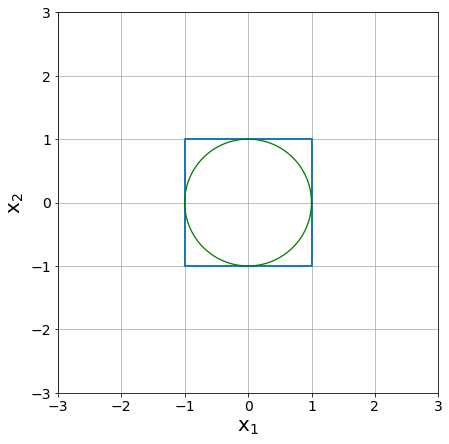

In [7]:
interact(transform,D11=(-3.,3.), D12=(-3.,3.), D21=(-3.,3.), D22=(-3.,3.))

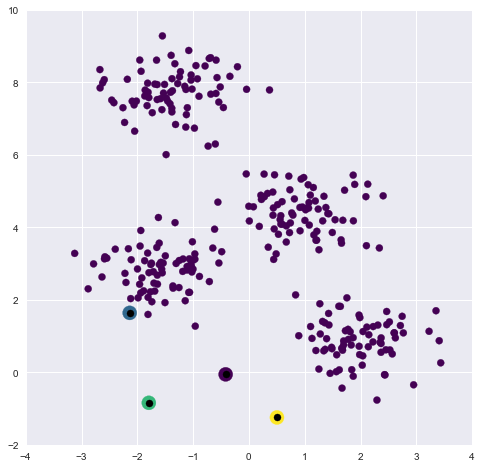

In [9]:
# Possibility for code-folding
def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)
        
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);
            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)
            

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = int(frame // 3)

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plt.figure(figsize=(8,8))
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                     ha='right', va='top', size=14)
        plt.show()
    
    return interact(_kmeans_step, frame=(0, 20),
                    n_clusters=(min_clusters, max_clusters))

plot_kmeans_interactive();

For further reading / viewing ...


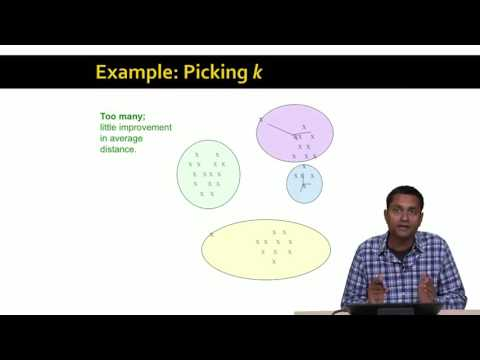

In [11]:
print("For further reading / viewing ...")
YouTubeVideo('RD0nNK51Fp8')

In [8]:
# initialization cell
from IPython.display import Image
from IPython.display import HTML
import math as m
import numpy as np
import matplotlib.pyplot as plt
#import ipywidgets as pywid
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os,sys
%matplotlib inline

# Import libraries
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()
import numpy as np

from IPython.lib.display import YouTubeVideo
from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
# Generate some data
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.8, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

![programming-hard](https://cdn-images-1.medium.com/max/2000/1*brjYnVlXwM3j_SWXImT0Rg.png)
![xkcd](https://imgs.xkcd.com/comics/machine_learning.png)